<a href="https://colab.research.google.com/github/spch88/my_project/blob/main/%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D1%81%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подготовка


### Импорт библиотек

In [ ]:
 # Импортируем модели keras: Model
from tensorflow.keras.models import Model

 # Импортируем стандартные слои keras
from tensorflow.keras.layers import Input, Conv2DTranspose, concatenate, Activation
from tensorflow.keras.layers import MaxPooling2D, Conv2D, BatchNormalization, UpSampling2D

# Импортируем оптимизатор Adam
from tensorflow.keras.optimizers import Adam 

# Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import matplotlib.pyplot as plt 

# Импортируем модуль image для работы с изображениями
from tensorflow.keras.preprocessing import image 

# Импортируем библиотеку numpy
import numpy as np 

# Импортируем методделения выборки
from sklearn.model_selection import train_test_split

# загрузка файлов по HTML ссылке
import gdown

# Для работы с файлами 
import os 

# Для генерации случайных чисел 
import random

import time

# импортируем модель Image для работы с изображениями
from PIL import Image 

# очистка ОЗУ
import gc 

### Загрузка датасета

грузим и распаковываем архив картинок

In [ ]:
# Загрузка датасета из облака

gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l14/construction_256x192.zip', None, quiet=False)
#gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l14/construction_512x384.zip', None, quiet=False)

!unzip -q 'construction_256x192.zip' # распаковываем архив

Downloading...
From: https://storage.yandexcloud.net/aiueducation/Content/base/l14/construction_256x192.zip
To: /content/construction_256x192.zip
100%|██████████| 214M/214M [00:11<00:00, 19.1MB/s]


## Решение

In [ ]:
# Глобальные параметры

IMG_WIDTH = 192               # Ширина картинки 
IMG_HEIGHT = 192              # Высота картинки 
NUM_CLASSES = 16              # Задаем количество классов на изображении
TRAIN_DIRECTORY = 'train'     # Название папки с файлами обучающей выборки
VAL_DIRECTORY = 'val'         # Название папки с файлами проверочной выборки

In [ ]:
# Загрузка оригинальных изображений
train_images = [] # Создаем пустой список для хранений оригинальных изображений обучающей выборки
val_images = [] # Создаем пустой список для хранений оригинальных изображений проверочной выборки

cur_time = time.time()  # Засекаем текущее время

# Проходим по всем файлам в каталоге по указанному пути  
for filename in sorted(os.listdir(TRAIN_DIRECTORY+'/original')):   
    # Читаем очередную картинку и добавляем ее в список изображений с указанным target_size
    train_images.append(image.load_img(os.path.join(TRAIN_DIRECTORY+'/original',filename),
                                       target_size=(IMG_WIDTH, IMG_HEIGHT)))               
    
# Отображаем время загрузки картинок обучающей выборки    
print ('Обучающая выборка загружена. Время загрузки: ', round(time.time() - cur_time, 2), 'c', sep='') 

# Отображаем количество элементов в обучающей выборке
print ('Количество изображений: ', len(train_images)) 

cur_time = time.time() # Засекаем текущее время

# Проходим по всем файлам в каталоге по указанному пути
for filename in sorted(os.listdir(VAL_DIRECTORY+'/original')):
    # Читаем очередную картинку и добавляем ее в список изображений с указанным target_size   
    val_images.append(image.load_img(os.path.join(VAL_DIRECTORY+'/original',filename), 
                                     target_size=(IMG_WIDTH, IMG_HEIGHT)))  

# Отображаем время загрузки картинок проверочной выборки
print ('Проверочная выборка загружена. Время загрузки: ', round(time.time() - cur_time, 2), 'c', sep='') 

# Отображаем количество элементов в проверочной выборке
print ('Количество изображений: ', len(val_images)) 

Обучающая выборка загружена. Время загрузки: 0.69c
Количество изображений:  1900
Проверочная выборка загружена. Время загрузки: 0.04c
Количество изображений:  100


In [ ]:
# Загрузка сегментированных изображений
train_segments = [] # Создаем пустой список для хранений оригинальных изображений обучающей выборки
val_segments = [] # Создаем пустой список для хранений оригинальных изображений проверочной выборки

cur_time = time.time() # Засекаем текущее время

for filename in sorted(os.listdir(TRAIN_DIRECTORY+'/segment')): # Проходим по всем файлам в каталоге по указанному пути     
    # Читаем очередную картинку и добавляем ее в список изображений с указанным target_size  
    train_segments.append(image.load_img(os.path.join(TRAIN_DIRECTORY+'/segment',filename),
                                       target_size=(IMG_WIDTH, IMG_HEIGHT)))                                                     
    
# Отображаем время загрузки картинок обучающей выборки
print ('Обучающая выборка загружена. Время загрузки: ', round(time.time() - cur_time, 2), 'c', sep='') 

# Отображаем количество элементов в обучающем наборе сегментированных изображений
print ('Количество изображений: ', len(train_segments)) 

cur_time = time.time() # Засекаем текущее время

for filename in sorted(os.listdir(VAL_DIRECTORY+'/segment')): # Проходим по всем файлам в каталоге по указанному пути
    # Читаем очередную картинку и добавляем ее в список изображений с указанным target_size                                                      
    val_segments.append(image.load_img(os.path.join(VAL_DIRECTORY+'/segment',filename), 
                                     target_size=(IMG_WIDTH, IMG_HEIGHT)))  

# Отображаем время загрузки картинок проверочной выборки
print ('Проверочная выборка загружена. Время загрузки: ', round(time.time() - cur_time, 2), 'c', sep='')

# Отображаем количество элементов в проверочном наборе сегментированных изображений
print ('Количество изображений: ', len(val_segments)) 

Обучающая выборка загружена. Время загрузки: 0.69c
Количество изображений:  1900
Проверочная выборка загружена. Время загрузки: 0.04c
Количество изображений:  100


In [ ]:
# Функция для просмотра изображений из набора
def show_imageset(image_list, segment_list,  # выборка изображений
                  n                           # количество картинок для просмотра
                  ):

    fig, axs = plt.subplots(2, n, figsize=(25, 10))       # Создание полотна из n графиков

    for i in range(n): 
        img1 = image_list[i]                              # Выборка фото для отображения
        axs[0, i].axis('off')
        axs[0, i].imshow(img1)                            # Отображение картинки

    for i in range(n): 
        img2 = segment_list[i]                            # Выборка соответствующего сегментированного изображения для отображения
        axs[1, i].axis('off')
        axs[1, i].imshow(img2)                            # Отображение картинки


    plt.show()                                            # Отрисовка изображений

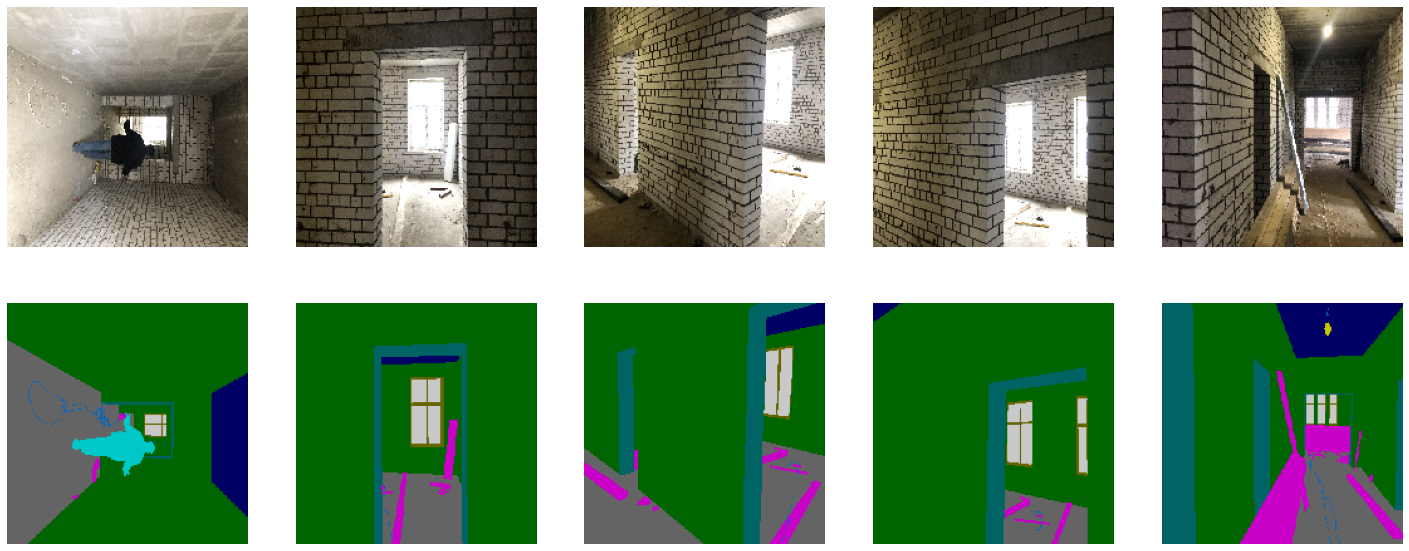

In [ ]:
show_imageset(train_images, train_segments, 5)

In [ ]:
# Цвета пикселов сегментированных изображений

FLOOR = (100, 100, 100)         # Пол (серый)
CEILING = (0, 0, 100)           # Потолок (синий)
WALL = (0, 100, 0)              # Стена (зеленый)
COLUMN = (100, 0, 0)            # Колонна (красный)
APERTURE = (0, 100, 100)        # Проем (темно-бирюзовый)
DOOR = (100, 0, 100)            # Дверь (бордовый)
WINDOW = (100, 100, 0)          # Окно (золотой)
EXTERNAL = (200, 200, 200)      # Внешний мир (светло-серый)
RAILINGS = (0, 200, 0)          # Перила (светло-зеленый)
BATTERY = (200, 0, 0)           # Батареи (светло-красный)
PEOPLE = (0, 200, 200)          # Люди (бирюзовый)
LADDER = (0, 0, 200)            # Лестница (светло-синий)
INVENTORY = (200, 0, 200)       # Инвентарь (розовый)
LAMP = (200, 200, 0)            # Лампа (желтый)
WIRE = (0, 100, 200)            # Провод (голубой)
BEAM = (100, 0, 200)            # Балка (фиолетовый)

CLASS_LABELS = (FLOOR, CEILING, WALL, COLUMN, APERTURE, DOOR, WINDOW, EXTERNAL, RAILINGS, BATTERY, PEOPLE, LADDER, INVENTORY, LAMP, WIRE, BEAM)

In [ ]:
# Сервисные функции

# Функция преобразования цветного сегментированного изображения в метки классов
def rgb_to_labels(image_list):
    result = []
  
    # Для всех изображений в списке:
    for d in image_list:
        sample = np.array(d)
        # Создание пустого 1-канального изображения
        y = np.zeros((IMG_WIDTH, IMG_HEIGHT, 1), dtype='uint8')
        
        # По всем классам:
        for i, cl in enumerate(CLASS_LABELS): 
            # Нахождение 3-х канальных пикселей классов и занесение метки класса
            y[np.where(np.all(sample == CLASS_LABELS[i], axis=-1))] = i 

        result.append(y)
  
    return np.array(result)


# Функция преобразования тензора меток класса в цветное сегметрированное изображение
def labels_to_rgb(image_list, class_labels=CLASS_LABELS):
    result = []

    # Для всех изображений в списке:
    for y in image_list:
        # Создание пустого цветного изображения
        temp = np.zeros((IMG_WIDTH, IMG_HEIGHT, 3), dtype='uint8')
        
        # По всем классам:
        for i, cl in enumerate(class_labels):
            # Нахождение пикселов класса и заполнение цветом из class_labels[i]
            temp[np.where(np.all(y==i, axis=-1))] = class_labels[i]

        result.append(temp)
  
    return np.array(result)

In [ ]:
# Формирование обучающей выборки
x_train = []                          # Cписок под обучающую выборку

for img in train_images:              # Для всех изображений выборки:
    x = image.img_to_array(img)       # Перевод изображения в numpy-массив формы: высота x ширина x количество каналов
    x_train.append(x)                 # Добавление элемента в x_train

x_train = np.array(x_train)           # Перевод всей выборки в numpy
print(x_train.shape)                  # Форма x_train

# Формирование проверочной выборки
x_val = []                            # Cписок под проверочную выборку

for img in val_images:                # Для всех изображений выборки:
    x = image.img_to_array(img)       # Перевод изображения в numpy-массив формы: высота x ширина x количество каналов
    x_val.append(x)                   # Добавление элемента в x_train

x_val = np.array(x_val)               # Перевод всей выборки в numpy
print(x_val.shape)                    # Форма x_train

(1900, 192, 192, 3)
(100, 192, 192, 3)


In [ ]:
# Преобразование сегментов в метки классов
y_train = rgb_to_labels(train_segments)
y_val = rgb_to_labels(val_segments)

print(y_train.shape)
print(y_val.shape)

(1900, 192, 192, 1)
(100, 192, 192, 1)


In [ ]:
# Сократим количество классов до 7
y_train7 = y_train.copy()
y_train7[(y_train7 == 4) | (y_train7 == 5) | (y_train7 == 6)] = 3
y_train7[(y_train7 == 3) | (y_train7 == 8) | (y_train7 == 11)] = 4
y_train7[y_train7 == 12] = 5
y_train7[(y_train7 == 7) | (y_train7 == 9) | (y_train7 == 10) | (y_train7 == 13)| (y_train7 == 14)| (y_train7 == 15)] = 6

y_val7 = y_val.copy()
y_val7[(y_val7 == 4) | (y_val7 == 5) | (y_val7 == 6)] = 3
y_val7[(y_val7 == 3) | (y_val7 == 8) | (y_val7 == 11)] = 4
y_val7[y_val7 == 12] = 5
y_val7[(y_val7 == 7) | (y_val7 == 9) | (y_val7 == 10) | (y_val7 == 13)| (y_val7 == 14)| (y_val7 == 15)] = 6

In [ ]:
# Цвета пикселов сегментированных изображений для 7 классов

FLOOR = (100, 100, 100)                                   # Пол (серый)
CEILING = (0, 0, 100)                                     # Потолок (синий)
WALL = (0, 100, 0)                                        # Стена (зеленый)
APERTURE_DOOR_WINDOW = (0, 100, 100)                      # Проем + дверь + окно (темно-бирюзовый)
COLUMN_RAILINGS_LADDER = (100, 0, 0)                      # Колонна + перила + лестница (красный)
INVENTORY = (200, 0, 200)                                 # Инвентарь (розовый)
LAMP_EXTERNAL_BATTERY_PEOPLE_WIRE_BEAM = (200, 200, 0)    # Лампа + внешний мир + батареи + люди + провод + балка (желтый)

CLASS_LABELS_NEW = (FLOOR, CEILING, WALL, APERTURE_DOOR_WINDOW, COLUMN_RAILINGS_LADDER, INVENTORY, LAMP_EXTERNAL_BATTERY_PEOPLE_WIRE_BEAM)

In [ ]:
# Преобразуем выборку для 7 классов в сегментированные изображения и запишем их в соответствующие файлы (каталог 'segment7')
os.mkdir(TRAIN_DIRECTORY + '/segment7')

files_segment7 = labels_to_rgb(y_train7, CLASS_LABELS_NEW)

for i in range(len(files_segment7)):
  pil_img = image.array_to_img(files_segment7[i])
  pil_img.save(TRAIN_DIRECTORY + '/segment7/train_original_image_' + str(i).zfill(5) + '.bmp')

In [ ]:
# Загрузка модулей для сегментации изображений
!pip install git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-itylmzc2
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-itylmzc2
     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 3.3 MB 37.2 MB/s 
     |████████████████████████████████| 948 kB 42.0 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34557 sha256=04554fced3fc5415191067a59385ff4a7cc9be6427d21eb2c7b2e2d594380e64
  Stored in directory: /tmp/pip-ephem-wheel-cache-_5k7_ccn/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfu

In [ ]:
# Загружаем модель PSPNet
from keras_segmentation.models.pspnet import pspnet

model = pspnet(n_classes=16, input_height=IMG_HEIGHT, input_width=IMG_WIDTH)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 194, 194, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 192, 192, 64  1792        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [ ]:
# Обучаем модель для 7 классов
model.train(
    n_classes = 7,
    train_images =  "./train/original/",
    train_annotations = "./train/segment7/",
    verify_dataset = False,
    epochs=30  
)

Epoch 1/30
512/512 [==============================] - 34s 37ms/step - loss: 0.2028 - accuracy: 0.9859
Epoch 2/30
512/512 [==============================] - 19s 37ms/step - loss: 0.3174 - accuracy: 0.9632
Epoch 3/30
512/512 [==============================] - 19s 37ms/step - loss: 0.3679 - accuracy: 0.8620
Epoch 4/30
512/512 [==============================] - 19s 38ms/step - loss: 0.3910 - accuracy: 0.8203
Epoch 5/30
512/512 [==============================] - 19s 37ms/step - loss: 0.4186 - accuracy: 0.7922
Epoch 6/30
512/512 [==============================] - 19s 37ms/step - loss: 0.4617 - accuracy: 0.7667
Epoch 7/30
512/512 [==============================] - 19s 37ms/step - loss: 0.4845 - accuracy: 0.7522
Epoch 8/30
512/512 [==============================] - 19s 37ms/step - loss: 0.5504 - accuracy: 0.7353
Epoch 9/30
512/512 [==============================] - 19s 37ms/step - loss: 0.5313 - accuracy: 0.7364
Epoch 10/30
512/512 [==============================] - 19s 37ms/step - loss: 0.572

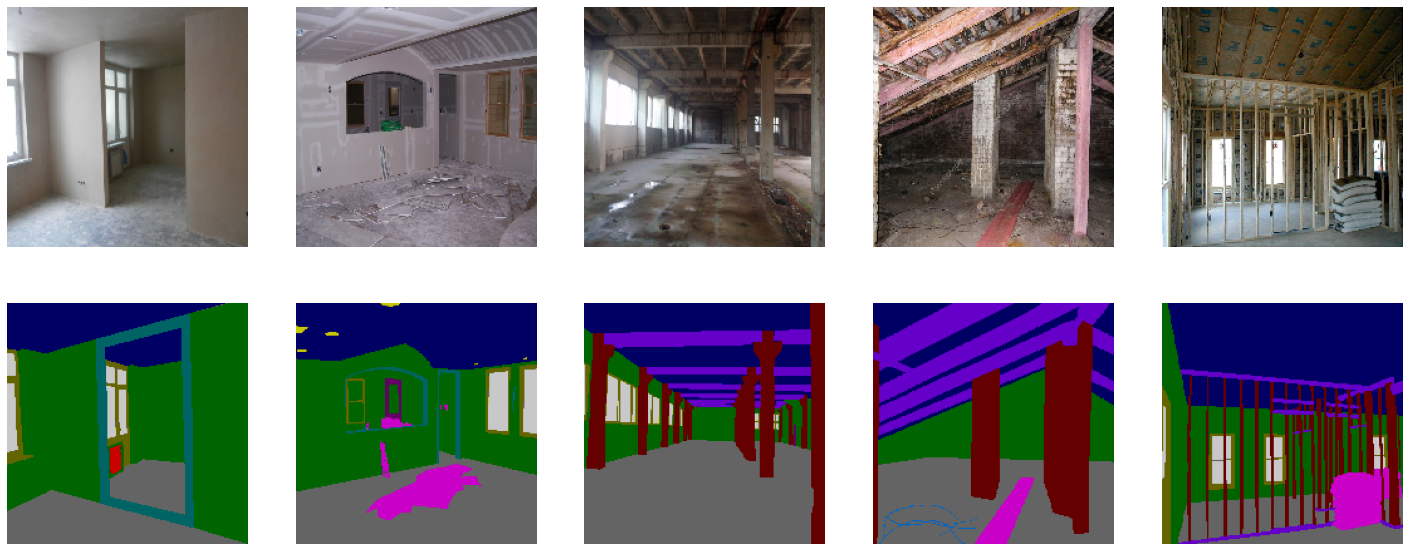

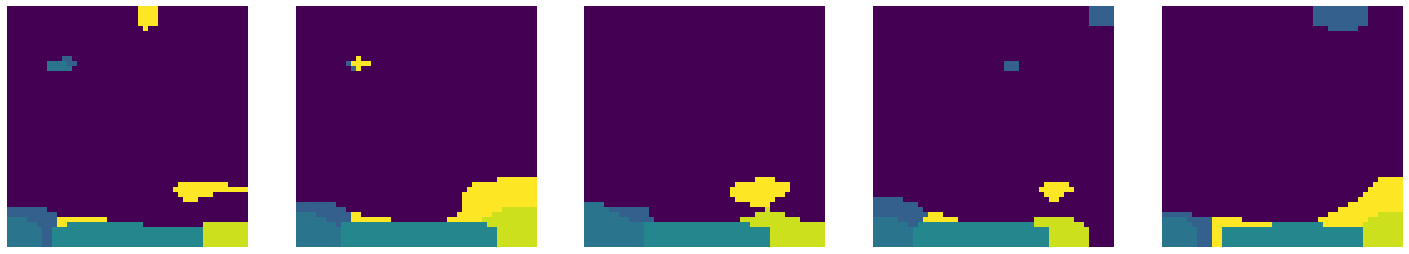

In [ ]:
# Проверка результатов сегментации
show_imageset(val_images, val_segments, 5)

fig, axs = plt.subplots(1, 5, figsize=(25, 10))      

for i in range(5):
    out = model.predict_segmentation(
      inp="/content/val/original/val_original_image_0000" + str(i) + ".bmp",
      out_fname="/tmp/out.png"
    )

    axs[i].axis('off')
    axs[i].imshow(out)

plt.show()